<a href="https://colab.research.google.com/github/AdrianCobo/Deep-Learning-And-Artificial-Intelligence/blob/main/Lesson_03_Regression_(Moore's_Law).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# get the tada
!wget https://raw.githubusercontent.com/AdrianCobo/Deep-Learning-And-Artificial-Intelligence/main/data/moore.csv

--2022-11-07 20:35:31--  https://raw.githubusercontent.com/AdrianCobo/Deep-Learning-And-Artificial-Intelligence/main/data/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-11-07 20:35:31 (44.3 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [49]:
data = pd.read_csv('moore.csv.1', header=None).values
X = data[:,0].reshape(-1,1) # make it a 2-D array of size M * D where D = 1
Y = data[:,1].reshape(-1,1)


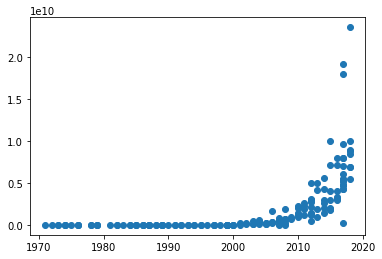

In [50]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

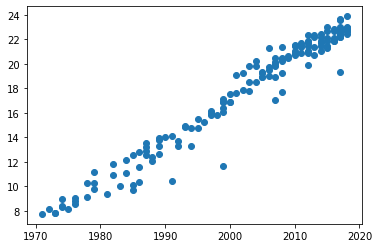

In [51]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X,Y);
# that's better

In [52]:
# Scale and center both the x and y axes
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx)/sx
Y = (Y - my)/sy

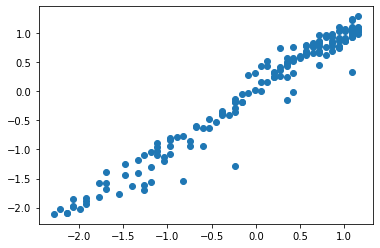

In [53]:
# Everything is centered and in a small range
plt.scatter(X,Y)

In [54]:
# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [55]:
# Create the linear regression model
model = nn.Linear(1,1)

In [56]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [57]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [58]:
type(inputs)

torch.Tensor

In [59]:
# Train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record the loss
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 1.0091
Epoch 2/100, Loss: 0.9706
Epoch 3/100, Loss: 0.9078
Epoch 4/100, Loss: 0.8316
Epoch 5/100, Loss: 0.7499
Epoch 6/100, Loss: 0.6683
Epoch 7/100, Loss: 0.5904
Epoch 8/100, Loss: 0.5180
Epoch 9/100, Loss: 0.4524
Epoch 10/100, Loss: 0.3939
Epoch 11/100, Loss: 0.3422
Epoch 12/100, Loss: 0.2972
Epoch 13/100, Loss: 0.2581
Epoch 14/100, Loss: 0.2245
Epoch 15/100, Loss: 0.1958
Epoch 16/100, Loss: 0.1712
Epoch 17/100, Loss: 0.1503
Epoch 18/100, Loss: 0.1326
Epoch 19/100, Loss: 0.1177
Epoch 20/100, Loss: 0.1050
Epoch 21/100, Loss: 0.0944
Epoch 22/100, Loss: 0.0854
Epoch 23/100, Loss: 0.0778
Epoch 24/100, Loss: 0.0715
Epoch 25/100, Loss: 0.0661
Epoch 26/100, Loss: 0.0617
Epoch 27/100, Loss: 0.0579
Epoch 28/100, Loss: 0.0547
Epoch 29/100, Loss: 0.0521
Epoch 30/100, Loss: 0.0499
Epoch 31/100, Loss: 0.0480
Epoch 32/100, Loss: 0.0465
Epoch 33/100, Loss: 0.0452
Epoch 34/100, Loss: 0.0441
Epoch 35/100, Loss: 0.0432
Epoch 36/100, Loss: 0.0424
Epoch 37/100, Loss: 0.0418
Epoch 38/1

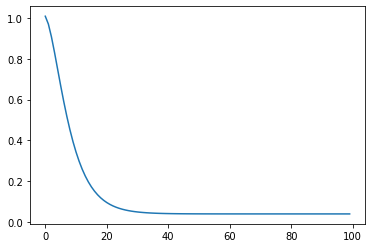

In [60]:
# Loss per iterations
plt.plot(losses);

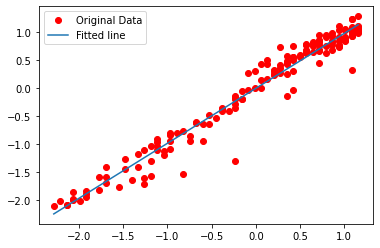

In [61]:
# Plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Original Data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [62]:
# What does this mean? see: https://youtu.be/i-FRnVTq1Lk?t=4036
w = model.weight.data.numpy()
print(w)

[[0.98054457]]


In [63]:
a = w[0,0] * sy / sx
print(a)

0.34167323389125015


In [64]:
print("Time to double:", np.log(2)/a)

Time to double: 2.0286844616589557
